# Web scraping


## What Is Web Scraping?

In [1]:
import pandas as pd

<img class="progressiveMedia-image js-progressiveMedia-image" data-src="https://cdn-images-1.medium.com/max/1600/1*GOyqaID2x1N5lD_rhTDKVQ.png" src="https://cdn-images-1.medium.com/max/1600/1*GOyqaID2x1N5lD_rhTDKVQ.png">

### Why Web Scraping for Data Science?

## Network complexity

## HTTP

## HTTP in Python: The Requests Library

[Requests: HTTP for Humans](https://2.python-requests.org/en/master/)

In [2]:
import requests

In [3]:
url = 'http://example.com/'

In [4]:
response = requests.get(url)

In [5]:
response

<Response [200]>

In [6]:
type(response)

requests.models.Response

In [8]:
if response.status_code == 200:
    print('OK')

OK


In [11]:
response.text

'<!doctype html>\n<html>\n<head>\n    <title>Example Domain</title>\n\n    <meta charset="utf-8" />\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <style type="text/css">\n    body {\n        background-color: #f0f0f2;\n        margin: 0;\n        padding: 0;\n        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;\n        \n    }\n    div {\n        width: 600px;\n        margin: 5em auto;\n        padding: 2em;\n        background-color: #fdfdff;\n        border-radius: 0.5em;\n        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);\n    }\n    a:link, a:visited {\n        color: #38488f;\n        text-decoration: none;\n    }\n    @media (max-width: 700px) {\n        div {\n            margin: 0 auto;\n            width: auto;\n        }\n    }\n    </style>    \n</head>\n\n<body>\n<div>\n    <

In [12]:
response.headers

{'Content-Encoding': 'gzip', 'Age': '596624', 'Cache-Control': 'max-age=604800', 'Content-Type': 'text/html; charset=UTF-8', 'Date': 'Mon, 18 May 2020 14:47:56 GMT', 'Etag': '"3147526947+gzip"', 'Expires': 'Mon, 25 May 2020 14:47:56 GMT', 'Last-Modified': 'Thu, 17 Oct 2019 07:18:26 GMT', 'Server': 'ECS (dcb/7EC9)', 'Vary': 'Accept-Encoding', 'X-Cache': 'HIT', 'Content-Length': '648'}

## HTML and CSS

<img class="progressiveMedia-image js-progressiveMedia-image" data-src="https://cdn-images-1.medium.com/max/1600/1*x9mxFBXnLU05iPy19dGj7g.png" src="https://cdn-images-1.medium.com/max/1600/1*x9mxFBXnLU05iPy19dGj7g.png">

### Hypertext Markup Language: HTML

Link strani: https://en.wikipedia.org/wiki/List_of_Game_of_Thrones_episodes

In [13]:
url_got = 'https://en.wikipedia.org/wiki/List_of_Game_of_Thrones_episodes'
r = requests.get(url_got)

In [15]:
html_contents = r.text

- `<p>...</p>` to enclose a paragraph;
- `<br>` to set a line break;
- `<table>...</table>` to start a table block, inside; `<tr>...<tr/>` is used for the rows; and `<td>...</td>` cells;
- `<img>` for images;
- `<h1>...</h1> to <h6>...</h6>` for headers;
- `<div>...</div>` to indicate a “division” in an HTML document, basically used to group a set of elements;
- `<a>...</a>` for hyperlinks;
- `<ul>...</ul>, <ol>...</ol>` for unordered and ordered lists respectively; inside of these, `<li>...</li>` is used for each list item.

## Using Your Browser as a Development Tool

## The Beautiful Soup Library

> **[beautifulsoup4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)**: Beautiful Soup tries to organize complexity: it helps to parse, structure and organize the oftentimes very messy web by fixing bad HTML and presenting us with an easy-to-work-with Python structure.

In [16]:
from bs4 import BeautifulSoup

- `html.parser`: a built-in Python parser that is decent (especially when using recent versions of Python 3) and requires no extra installation.
- `lxml`: which is very fast but requires an extra installation.
- `html5lib`: which aims to parse web page in exactly the same way as a web browser does, but is a bit slower.

In [47]:
html_soup = BeautifulSoup(html_contents, 'html.parser')

In [20]:
type(html_soup)

bs4.BeautifulSoup

In [26]:
first_h1 = html_soup.find('h1')
first_h1

<h1 class="firstHeading" id="firstHeading" lang="en">List of <i>Game of Thrones</i> episodes</h1>

In [28]:
str(first_h1)

'<h1 class="firstHeading" id="firstHeading" lang="en">List of <i>Game of Thrones</i> episodes</h1>'

In [24]:
first_h1.name

'h1'

In [25]:
first_h1.contents

['List of ', <i>Game of Thrones</i>, ' episodes']

In [27]:
first_h1.text

'List of Game of Thrones episodes'

In [29]:
first_h1.get_text()

'List of Game of Thrones episodes'

In [30]:
first_h1.attrs

{'id': 'firstHeading', 'class': ['firstHeading'], 'lang': 'en'}

In [31]:
first_h1.attrs['id']

'firstHeading'

In [32]:
first_h1['id']

'firstHeading'

- `find(name, attrs, recursive, string, **keywords)`

In [33]:
html_soup.find('', attrs={'id': 'p-logo'})

<div id="p-logo" role="banner">
<a class="mw-wiki-logo" href="/wiki/Main_Page" title="Visit the main page"></a>
</div>

- `find_all(name, attrs, recursive, string, limit, **keywords)`

In [39]:
for tag in html_soup.find_all('h2'):
    print(tag.text)
    print()

Contents

Series overview[edit]

Episodes[edit]

Specials[edit]

Home media release[edit]

Ratings[edit]

References[edit]

External links[edit]

Navigation menu



In [53]:
cites = html_soup.find_all('cite', class_='citation', limit=6)

In [59]:
for citation in cites:
    print(citation.get_text(), end='\n\n')
    link = citation.find('a')
    print(link.get('href'))
    print('-------------')

Fowler, Matt (April 8, 2011). "Game of Thrones: "Winter is Coming" Review". IGN. Archived from the original on August 17, 2012. Retrieved September 22, 2016.

http://tv.ign.com/articles/116/1160215p1.html
-------------
Fleming, Michael (January 16, 2007). "HBO turns Fire into fantasy series". Variety. Archived from the original on May 16, 2012. Retrieved September 3, 2016.

https://www.variety.com/article/VR1117957532.html?categoryid=14&cs=1
-------------
"Game of Thrones". Emmys.com. Retrieved September 17, 2016.

http://www.emmys.com/shows/game-thrones
-------------
Roberts, Josh (April 1, 2012). "Where HBO's hit 'Game of Thrones' was filmed". USA Today. Archived from the original on April 1, 2012. Retrieved March 8, 2013.

https://web.archive.org/web/20120401123724/http://travel.usatoday.com/destinations/story/2012-04-01/Where-the-HBO-hit-Game-of-Thrones-was-filmed/53876876/1
-------------
Schwartz, Terri (January 28, 2013). "'Game of Thrones' casts a bear and shoots in Los Angeles 

In [60]:
import requests
from bs4 import BeautifulSoup

url = 'https://en.wikipedia.org/wiki/List_of_Game_of_Thrones_episodes'
r = requests.get(url)
html_contents = r.text

html_soup = BeautifulSoup(html_contents, 'html.parser')

In [61]:
episodes = []

ep_tables = html_soup.find_all('table', class_='wikiepisodetable', limit=8)

In [62]:
len(ep_tables)

8

In [76]:
for table in ep_tables:
    headers = []
    rows = table.find_all('tr')
    
    for header in table.find('tr').find_all('th'):
        headers.append(header.text)
            
    for row in table.find_all('tr')[1:]:
        values = []
        for col in row.find_all(['th', 'td']):
            values.append(col.text)
        
        if values:
            episode_dict = {headers[i]: values[i] for i in range(len(values))}
            episodes.append(episode_dict)
    


In [77]:
for episode in episodes[:3]:
    print(episode)

{'No.overall': '1', 'No. inseason': '1', 'Title': '"Winter Is Coming"', 'Directed by': 'Tim Van Patten', 'Written by': 'David Benioff & D. B. Weiss', 'Original air date\u200a[20]': 'April\xa017,\xa02011\xa0(2011-04-17)', 'U.S. viewers(millions)': '2.22[21]'}
{'No.overall': '2', 'No. inseason': '2', 'Title': '"The Kingsroad"', 'Directed by': 'Tim Van Patten', 'Written by': 'David Benioff & D. B. Weiss', 'Original air date\u200a[20]': 'April\xa024,\xa02011\xa0(2011-04-24)', 'U.S. viewers(millions)': '2.20[22]'}
{'No.overall': '3', 'No. inseason': '3', 'Title': '"Lord Snow"', 'Directed by': 'Brian Kirk', 'Written by': 'David Benioff & D. B. Weiss', 'Original air date\u200a[20]': 'May\xa01,\xa02011\xa0(2011-05-01)', 'U.S. viewers(millions)': '2.44[23]'}


In [78]:
got_df = pd.DataFrame(episodes)

In [80]:
got_df.head(10)

,No.overall,No. inseason,Title,Directed by,Written by,Original air date [20],U.S. viewers(millions)
0,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,"April 17, 2011 (2011-04-17)",2.22[21]
1,2,2,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,"April 24, 2011 (2011-04-24)",2.20[22]
2,3,3,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,"May 1, 2011 (2011-05-01)",2.44[23]
3,4,4,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,"May 8, 2011 (2011-05-08)",2.45[24]
4,5,5,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,"May 15, 2011 (2011-05-15)",2.58[25]
5,6,6,"""A Golden Crown""",Daniel Minahan,Story by : David Benioff & D. B. Weiss Telepla...,"May 22, 2011 (2011-05-22)",2.44[26]
6,7,7,"""You Win or You Die""",Daniel Minahan,David Benioff & D. B. Weiss,"May 29, 2011 (2011-05-29)",2.40[27]
7,8,8,"""The Pointy End""",Daniel Minahan,George R. R. Martin,"June 5, 2011 (2011-06-05)",2.72[28]
8,9,9,"""Baelor""",Alan Taylor,David Benioff & D. B. Weiss,"June 12, 2011 (2011-06-12)",2.66[29]
9,10,10,"""Fire and Blood""",Alan Taylor,David Benioff & D. B. Weiss,"June 19, 2011 (2011-06-19)",3.04[30]


## Web APIs

### Primer uporabe APIja

https://github.com/HackerNews/API

In [85]:
url = 'https://hacker-news.firebaseio.com/v0'

In [94]:
top_stroies_res = requests.get(f'{url}/topstories.json?print=pretty')

In [95]:
top_stories = top_stroies_res.json()
print(top_stories[:10])

[23223219, 23223335, 23223147, 23220081, 23222019, 23222815, 23221447, 23219782, 23221255, 23223681]


In [98]:
articles = []

In [100]:
for stroy_id in top_stories[:10]:
    story_url = f'{url}/item/{stroy_id}.json?print=pretty' 
    print(f'Prenos: {story_url}')
    r = requests.get(story_url)
    story_dict = r.json()
    articles.append(story_dict)

Prenos: https://hacker-news.firebaseio.com/v0/item/23223219.json?print=pretty
Prenos: https://hacker-news.firebaseio.com/v0/item/23223335.json?print=pretty
Prenos: https://hacker-news.firebaseio.com/v0/item/23223147.json?print=pretty
Prenos: https://hacker-news.firebaseio.com/v0/item/23220081.json?print=pretty
Prenos: https://hacker-news.firebaseio.com/v0/item/23222019.json?print=pretty
Prenos: https://hacker-news.firebaseio.com/v0/item/23222815.json?print=pretty
Prenos: https://hacker-news.firebaseio.com/v0/item/23221447.json?print=pretty
Prenos: https://hacker-news.firebaseio.com/v0/item/23219782.json?print=pretty
Prenos: https://hacker-news.firebaseio.com/v0/item/23221255.json?print=pretty
Prenos: https://hacker-news.firebaseio.com/v0/item/23223681.json?print=pretty


In [103]:
articles[1]['title']

'Uber Cuts 3000 More Jobs, Closes 45 Offices'

### Import data from web - pandas

##### [Odprti podatki Slovenije](https://podatki.gov.si/)


Na portalu OPSI boste našli vse od podatkov, orodij, do koristnih virov, s katerimi boste lahko razvijali spletne in mobilne aplikacije, oblikovali lastne infografike in drugo

Primer: https://support.spatialkey.com/spatialkey-sample-csv-data/

In [104]:
data = pd.read_csv('http://samplecsvs.s3.amazonaws.com/Sacramentorealestatetransactions.csv')

In [106]:
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


## Web Scraping using pandas

> Spletna stran: https://www.fdic.gov/bank/individual/failed/banklist.html

`pandas.read_html: ` Read HTML tables into a list of DataFrame objects. -> [Dokumentacija](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.read_html.html)



In [2]:
import pandas as pd

In [108]:
!pip install lxml

     |████████████████████████████████| 5.7MB 3.7MB/s eta 0:00:01     |████████                        | 1.4MB 1.3MB/s eta 0:00:04     |██████████████                  | 2.5MB 1.3MB/s eta 0:00:03     |█████████████████████▎          | 3.8MB 1.3MB/s eta 0:00:02


In [3]:
my_data = pd.read_html('https://www.fdic.gov/bank/individual/failed/banklist.html')

In [6]:
len(my_data)

1

In [7]:
failed_banks = my_data[0]

In [8]:
failed_banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date
0,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020"
1,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020"
2,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019"
3,Resolute Bank,Maumee,OH,58317,Buckeye State Bank,"October 25, 2019"
4,Louisa Community Bank,Louisa,KY,58112,Kentucky Farmers Bank Corporation,"October 25, 2019"


In [9]:
failed_banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 6 columns):
Bank Name                561 non-null object
City                     561 non-null object
ST                       561 non-null object
CERT                     561 non-null int64
Acquiring Institution    561 non-null object
Closing Date             561 non-null object
dtypes: int64(1), object(5)
memory usage: 26.4+ KB


## Primeri

### Scraping and Visualizing IMDB Ratings

Stran: http://www.imdb.com/title/tt0944947/episodes

https://www.crummy.com/software/BeautifulSoup/bs4/doc/

In [10]:
import requests
from bs4 import BeautifulSoup
url = 'http://www.imdb.com/title/tt0944947/episodes'

In [16]:
episodes = []
ratings = []

for season in range(1,9):
    r = requests.get(url, params={'season': season})    
    soup = BeautifulSoup(r.text, 'html.parser')
    listing = soup.find('div', class_='eplist')
    
    for epnr, div in enumerate(listing.find_all('div', recursive=False)):
        episode = f'{season}.{epnr + 1}'
        rating_el = div.find(class_='ipl-rating-star__rating')
        #print(episode, rating_el)
        rating = float(rating_el.get_text(strip=True))
        episodes.append(episode)
        ratings.append(rating)

In [18]:
print(episodes[:20])

['1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '1.10', '2.1', '2.2', '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '2.10']


In [19]:
print(ratings[:20])

[9.1, 8.8, 8.7, 8.8, 9.1, 9.2, 9.2, 9.0, 9.6, 9.5, 8.8, 8.5, 8.8, 8.8, 8.8, 9.1, 8.9, 8.8, 9.7, 9.4]


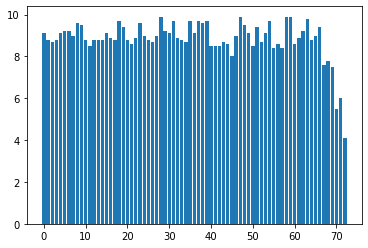

In [22]:
import matplotlib.pyplot as plt

plt.figure()
positions = [a for a in range(len(ratings))]
plt.bar(positions, ratings, align='center')
plt.show()

### Scraping Fast Track data

Stran: https://www.fasttrack.co.uk/league-tables/tech-track-100/league-table/

In [23]:
# import libraries
from bs4 import BeautifulSoup
import requests
import csv

In [24]:
# specify the url
urlpage =  'http://www.fasttrack.co.uk/league-tables/tech-track-100/league-table/'

In [26]:
page = requests.get(urlpage)
soup = BeautifulSoup(page.text, 'html.parser')

In [28]:
table = soup.find('table', attrs={'class': 'tableSorter2'})
results = table.find_all('tr')
print(f'Number of results {len(results)}')

Number of results 101


In [29]:
rows = []
rows.append(['Rank', 'Company Name', 'Webpage', 
             'Description', 'Location', 'Year end', 
             'Annual sales rise over 3 years', 'Sales £000s', 
             'Staff', 'Comments'])

In [35]:
for num, result in enumerate(results):
    data = result.find_all('td')
    if len(data) == 0:
        continue
        
    # write columns to variables
    rank = data[0].getText()
    company = data[1].getText()
    location = data[2].getText()
    yearend = data[3].getText()
    salesrise = data[4].getText()
    sales = data[5].getText()
    staff = data[6].getText()
    comments = data[7].getText()
    
    companyname = data[1].find('span', attrs={'class': 'company-name'}).getText()
    description = company.replace(companyname, '')
    print(f'{num} - Company is {companyname}')
    
    #print(sales)
    
    sales = sales.strip('*').replace(',', '')
    
    url = data[1].find('a').get('href')
    page = requests.get(url)
    
    soup = BeautifulSoup(page.text, 'html.parser')
    
    try:
        table_row = soup.find('table').find_all('tr')[-1]
        webpage = table_row.find('a').get('href')
    except:
        webpage = None
        
    
    rows.append([rank, companyname, webpage, description, location, salesrise, sales, staff, comments])

1 - Company is Revolut
2 - Company is Bizuma
3 - Company is Global-e
4 - Company is Jungle Creations
5 - Company is Oxford Nanopore Technologies
6 - Company is Lendable
7 - Company is Verve
8 - Company is Onfido
9 - Company is Reverse Media Group
10 - Company is Rebound Returns
11 - Company is ClearScore
12 - Company is SPOKE
13 - Company is FSB
14 - Company is Decibel
15 - Company is Miss Group
16 - Company is ComplyAdvantage
17 - Company is OTA Insight
18 - Company is Light Source
19 - Company is Digi2al
20 - Company is Perkbox
21 - Company is Lending Works
22 - Company is Faculty
23 - Company is Internet Mobile Communications
24 - Company is Fruugo
25 - Company is Featurespace
26 - Company is Monterosa
27 - Company is Lockwood Publishing
28 - Company is Plan.com
29 - Company is Capital on Tap
30 - Company is In Touch Networks
31 - Company is DV Signage
32 - Company is Ogury
33 - Company is Chameleon Technology
34 - Company is iwoca
35 - Company is Byte
36 - Company is Matillion
37 -

In [37]:
rows[1]

['1',
 'Revolut',
 'http://www.revolut.com',
 'Digital banking services provider',
 'East London',
 '507.56%',
 '58300',
 '700',
 'Valued at $1.7bn in 2018 and reported to be raising an additional $500m this year that could value it at $5bn']

In [38]:
with open('OUT_companies.csv', 'w') as f:
    csv_output = csv.writer(f)
    csv_output.writerows(rows)

In [39]:
df = pd.read_csv('OUT_companies.csv')

In [41]:
df.head()

,Rank,Company Name,Webpage,Description,Location,Year end,Annual sales rise over 3 years,Sales £000s,Staff,Comments
0,1,Revolut,http://www.revolut.com,Digital banking services provider,East London,507.56%,58300,700,Valued at $1.7bn in 2018 and reported to be ra...,NaN
1,2,Bizuma,http://www.bizuma.com,B2B e-commerce platform,Central London,315.18%,26414,114,Connects wholesale buyers and sellers from ove...,NaN
2,3,Global-e,http://www.global-e.com,Cross-border ecommerce solutions,Central London,303.09%,29297,28,Its technology helps ecommerce retailers local...,NaN
3,4,Jungle Creations,http://www.junglecreations.com,Social media & ecommerce services,East London,302.53%,15972,159,Launched the first-ever delivery-only restaura...,NaN
4,5,Oxford Nanopore Technologies,http://www.nanoporetech.com,DNA analysis technology,Oxford,251.87%,32500,439,Has raised £451m in funding and was valued at ...,NaN
